import basic modules

In [3]:

import pandas as pd
import numpy as np


load the data

In [4]:

df = pd.read_excel('./Downloads/credit-card.xls', index_col=0, skiprows=1)

isolate prediction label with features

In [5]:

X = df.copy()
y = X.pop('default payment next month')

split the data between test and train data

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

execute the decision tree class on the features

In [8]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.7205555555555555

In [9]:

from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}

grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [10]:

grid_object.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=50,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                       

In [11]:

grid_object.best_params_

{'max_depth': 3, 'min_samples_leaf': 0.02}

In [12]:


dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50, max_depth = 3, min_samples_leaf = .02)

dt.fit(X_train, y_train)

dt.score(X_test, y_test)

0.8173333333333334

In [13]:

y_pred = dt.predict(X_test)

In [14]:

print(y_pred)

[0 0 0 ... 0 0 0]


In [15]:

from sklearn.metrics import confusion_matrix, accuracy_score 
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[6629  380]
 [1264  727]]


In [16]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

c:\users\ritesh\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


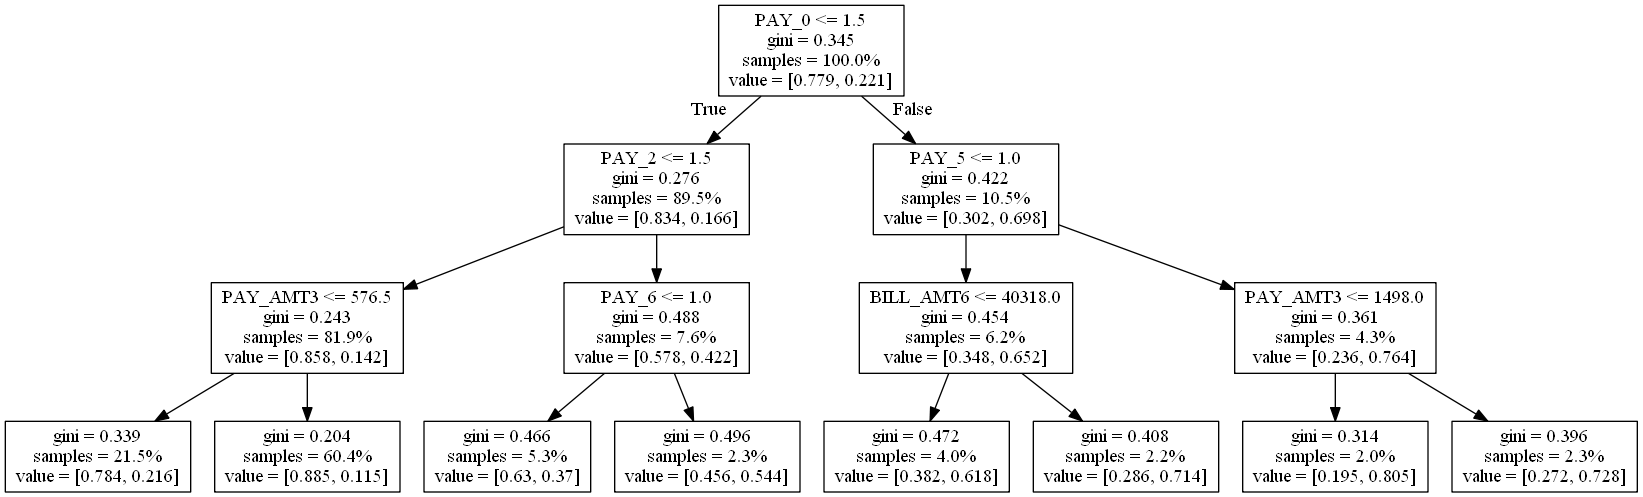

In [15]:

data = tree.export_graphviz(dt, out_file=None, feature_names= X.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 

# Show graph
Image(graph.create_png())